**Autores**

Hellen Rakel Palma Enriquez

Maria Adelaida Suarez Restrepo


# Librerias y estaticos

Se relacionan las rutas de acceso a los archivos, previamente compartidos con david.villanueva@udea.edu.co

df = https://drive.google.com/drive/u/0/folders/1VnvMHeTpsn7CujCmsV-qHCtYtIe-aa6n

In [1]:
# Manejo archivos
# ==============================================================================
import os
import hashlib
from os import listdir, path
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Gráficos
# ==============================================================================
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler


In [2]:
# Conexion con Drive
# ==============================================================================
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Los datos en ruta_eventos y ruta_incidentes, son de es restringido por razones de privacidad de la empresa propietaria, en suma, se tiene el compromiso de no publicar o compartir datos personales o del negocio como tal, por lo que esta información no es de acceso publico, y su procesamiento se realiza para crear el dataset ya anonimizado que podrá usarse en el desarrollo del proyecto.

In [3]:
ruta_eventos = '/content/drive/MyDrive/monografia/Tablas/eventos'
ruta_incidentes = '/content/drive/MyDrive/monografia/Tablas/Incidentes.xlsx'
path_df = '/content/drive/MyDrive/monografia/dataset/dataset_base.csv'

Esta ruta corresponde al dataset resultante despues de procesar los datos privados.

In [4]:
base_url = 'https://raw.githubusercontent.com/adelaida-suarez-UdeA/Monografia_UdeA/refs/heads/main/documentos/dataset_base.csv'

## Funciones

In [5]:
#Librerias
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Factor de Inflación de la Varianza VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def multiple_plot(ncols, data, columns, target_var, plot_type, title, rot):
    '''
    Returns the figure build from input parameters.

        Parameters:
            ncols       [integer]    Number of columns for subplots.
            data        [dataframe]  Features dataframe.
            columns     [list]       List of names of featutes in dataframe to plot.
            target_var  [string]     Name of column of target variable or feature.
            plot_type   [string]     Name of graphic. [countplot, boxplt or scatterplot]
            title       [string]     Title for figure
            rot         [integer]    Rotation angle for x axis labels
        Returns:
            Plot of figure

    Ejemplos:
        multiple_plot(1, d , None, 'bad_credit', 'countplot', 'Frecuencia de instancias para la variable bad_credit',0)
        multiple_plot(1, d , 'purpose', 'age_yrs', 'boxplot', 'Distribución de la variable próposito vs la edad',90)
        multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)
        multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)
        multiple_plot(3, d , catCols, 'age_yrs', 'boxplot', 'Distribución de la variables categóticas vs. la edad',30)
    '''


    # Paletas de colores y colores de las gráficas
    paletas = ['nipy_spectral','hsv','jet_r','Paired','Set2','Dark2','tab10','husl','mako']
    color = ['steelblue','forestgreen', 'amber']


    # Parámetros iniciales
    title_dist = 1.1  # Ajusta la distancia vertical del título en el gráfico
    x = -1            # Ubicación en el eje x del gráfico
    y =  0            # Ubicación en el eje y del gráfico
    nrows = 1         # Número inicial de filas


    # Ajustar el número de filas según el tipo de gráfico y la cantidad de columnas
    if isinstance(columns, list):
        nrows = math.ceil(len(columns) / ncols)

    # Crear el gráfico según el tipo especificado
    if ((nrows <= 1 and ncols <= 1) or plot_type == 'scatterplot'):

        # Countplot
        if plot_type == 'countplot':
            # Configurar el gráfico countplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.countplot(data=data,
                          x=target_var,
                          ax=axes,
                          palette=paletas[0],
                          zorder=1,
                          order=data[target_var].value_counts().index,
                          alpha=0.8
                          )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)

        # Boxplot
        elif plot_type == 'boxplot':
            # Configurar el gráfico boxplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.boxplot(data=data,
                        x=columns,
                        y=target_var,
                        ax=axes,
                        palette=paletas[0],
                        zorder=1
                        )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)


        # Scatterplot Matrix (Pairplot)
        elif plot_type == 'scatterplot':
            # Configurar el gráfico pairplot
            plot = sns.pairplot(data[columns],
                                palette=paletas[0],
                                diag_kws={'color': color[1]},
                                plot_kws={'color': color[0]},
                                diag_kind='kde'
                                )
            # Ajustar el tamaño del gráfico
            plot.fig.set_size_inches(12, 12)
            # Añadir un título al pairplot
            plot.fig.suptitle(title, fontsize=14, fontweight="bold")
            # Ajustar el diseño para evitar solapamientos
            plt.subplots_adjust(top=0.9)
            # Mostrar el gráfico
            plt.show()

    # Graficar más de un subplot
    else:
        # Crear subplots con el número especificado de filas y columnas
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, (nrows * 3) + 1))

        for i, column in enumerate(columns):
            x = x + 1

            # Reiniciar x e incrementar y si x alcanza el número de columnas
            if x >= ncols:
                y = y + 1
                x = 0

            # Configurar el subplot actual
            if nrows == 1:
                ax_cond = axes[i]
                title_dist = 1.1
            else:
                ax_cond = axes[y, x]

            # Crear el gráfico según el tipo especificado
            if plot_type == 'countplot':
                # Countplot
                sns.countplot(data=data,
                              x=column,
                              ax=ax_cond,
                              hue=column,
                              palette=paletas[0],
                              zorder=1,
                              edgecolor='black',
                              linewidth=0.5,
                              order=data[column].value_counts().index,
                              legend=False
                              )

            elif plot_type == 'boxplot':
                # Boxplot
                sns.boxplot(data=data,
                            x=column,
                            y=target_var,
                            ax=ax_cond,
                            palette=paletas[0],
                            zorder=1
                            )

            # Añadir cuadrícula en el eje y
            ax_cond.grid(axis='y', zorder=0)
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título del subplot
            ax_cond.set_title(column, fontsize=10)
            # Ajustar tamaño de las etiquetas
            ax_cond.tick_params(labelsize=8)
            # Limpiar etiquetas del eje x
            ax_cond.set_xlabel("")

        # Ajustar el diseño y el título general del conjunto de subplots
        fig.tight_layout()
        fig.suptitle(title, fontsize=14, fontweight="bold", y=title_dist - 0.15)
        plt.subplots_adjust(top=0.9)

        # Eliminar subplots sin datos si hay más de una fila
        if nrows > 1:
            for ax in axes.flat:
                if not bool(ax.has_data()):
                    fig.delaxes(ax)  # Eliminar si no hay datos en el subplot

In [6]:
def crear_alias(nombre_cedula):
    """ Method to anominize personal infromation
    Encode the string into bytes and create a unique hash

      Parameters:
        nombre_cedula: string

      Returns:
        string
    """
    # Codificar la cadena en bytes y crear un hash único
    return hashlib.md5(nombre_cedula.encode()).hexdigest()

# 1. Datos originales

Los datos originales se recopilaron en archivos csv y se extrajeron de una base de datos Azure, propiedad de la empresa facilitadora de la información. Estos dan cuenta de registros de eventos riesgosos relacionados a las flotas de carga de transporte primario terrestre, ocurridos entre julio y septiembre del 2024
De esta base de datos, se toman registros tanto de los eventos riesgosos como de los incidentes y se crean dos dataframes (df_eventos, df_incidentes) a partir de estas categorías.

https://drive.google.com/drive/folders/1E4CZE89iY9uu_N5pj9Gl2EKt7sYUBNz3?usp=sharing


##Tablas eventos

df_eventos contiene información de los eventos riesgosos: “posible volcamiento”, “giro brusco”, “frenada brusca”, “aceleración brusca”, “posible incidente” y “exceso de velocidad prolongada”. Cada uno de estos eventos mencionados, es una tabla con datos recopilados bajo condiciones operativas normales en tiempo real al momento de la ocurrencia del evento, por sensores instalados en los tractocamiones.

In [7]:
# Creación df_eventos
# ==============================================================================
df_eventos = pd.DataFrame()
for i, df in enumerate([pd.read_csv(path.join(ruta_eventos, file), sep=';') for file in listdir(ruta_eventos)]):
    if i == 0:
        df_eventos = df
    else:
        df_eventos = pd.concat([df_eventos, df], axis=0)

df_eventos.reset_index(drop=True)
df_eventos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152042 entries, 0 to 59841
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Address                  152028 non-null  object 
 1   Altitude                 152042 non-null  int64  
 2   CompanyId                152042 non-null  int64  
 3   CompanyName              152042 non-null  object 
 4   CustomerId               152042 non-null  int64  
 5   CustomerName             152042 non-null  object 
 6   DateTimeUTC              152042 non-null  object 
 7   DisplayName              152042 non-null  object 
 8   EngineStatus             152042 non-null  bool   
 9   EventDetail              535 non-null     object 
 10  EventLogId               152042 non-null  int64  
 11  EventTypeId              152042 non-null  int64  
 12  EventTypeName            152042 non-null  object 
 13  EventValue               76851 non-null   object 
 14  FleetId   

En este caso el trabajo se centrará en el estudio de los tractocamiones, llamados dentro de la compañía: transporte primario o T1, por eso se realiza el filtro a la variable 'VehicleTypeName'

In [8]:
# Conservamos los eventos de los tractocamiones (flota en estudio)
# ==============================================================================
df_eventos = df_eventos[df_eventos['VehicleTypeName'] == "TRACTOCAMION"]
df_eventos = df_eventos[df_eventos['CompanyName'].str.contains("T1", na=False)]
df_eventos.shape

(149573, 38)

En el trabajo estudiaremos solo accidentes viales. Para el caso todo incidente sin driver corresponde a un incidente fuera de las vias, mientras el tractocamion esta dentro de centros de operacion.

In [9]:
# Eliminamos accidentes dentro de centros de operación (sin driver)
# ==============================================================================
df_eventos = df_eventos.dropna(subset=['EventValue'])

Para dar cumplimiento a las restricciones de privacidad demandas por la empresa propietaria de los datos, se anonimiza la columna de los nombres de conductores, creando la variable “Driver”

In [10]:
# Alias del conductor
# ==============================================================================
df_eventos['CC'] = df_eventos['EventValue'].str.split(' - ').str[-1].str.strip()
df_eventos['Driver'] = df_eventos['EventValue'].apply(crear_alias)

In [11]:
df_eventos.head(3)

,Address,Altitude,CompanyId,CompanyName,CustomerId,CustomerName,DateTimeUTC,DisplayName,EngineStatus,EventDetail,...,VehicleFilterFieldText2,VehicleId,VehicleInternalName,VehicleModelId,VehicleModelName,VehiclePlate,VehicleTypeId,VehicleTypeName,CC,Driver
0,"Vía Garzón - Neiva, A 1.4 Km al Occidente de C...",599,118,T1-PRIMARIA,1075,POSTOBON S.A.,2024-07-01T00:15:19Z,NLW052,True,NaN,...,NaN,32174,3510549,486,DAF CF 480 6x4,NLW052,21,TRACTOCAMION,1012407458,619821981521b6a79e4d77399060fe92
1,"Vía Garzón - Neiva, A 2 Km al SurOccidente de ...",515,118,T1-PRIMARIA,1075,POSTOBON S.A.,2024-07-01T00:18:17Z,NLW052,True,NaN,...,NaN,32174,3510549,486,DAF CF 480 6x4,NLW052,21,TRACTOCAMION,1012407458,619821981521b6a79e4d77399060fe92
2,"Vía Garzón - Neiva, A 1.7 Km al Occidente de ...",517,118,T1-PRIMARIA,1075,POSTOBON S.A.,2024-07-01T00:18:43Z,NLW052,True,NaN,...,NaN,32174,3510549,486,DAF CF 480 6x4,NLW052,21,TRACTOCAMION,1012407458,619821981521b6a79e4d77399060fe92


Se crea una variable “llave” empleando “fecha_h_ev” (fecha del evento), “DisplayName” (identificación del tractocamion) y “CC”  (identificación del conductor), para comunicar posteriormente los datos con df_incidentes

In [12]:
# Creamos variables y llaves necesarias
# ==============================================================================
df_eventos['DateTimeUTC'] = pd.to_datetime(df_eventos['DateTimeUTC'], errors='coerce')
df_eventos['fecha_h_ev'] = df_eventos['DateTimeUTC'].dt.date.astype(str)
df_eventos['llave'] = df_eventos['fecha_h_ev'] + df_eventos['DisplayName'].str.strip() + df_eventos['CC'].str.strip()
df_eventos.shape

(76850, 42)

Se eliminan las columnas que no van a ser utilizadas para el análisis, ya que se conoce desde la experiencia de la información de negocios, que algunas de éstas contienen textos ingresados dentro de la operación o son redundantes en su contenido

In [13]:
# Eliminamos variables basura
# ==============================================================================
cols_a_eliminar = df_eventos.columns[[
0,2,3,4,5,9,10,11,13,14,16,17,18,21,22,24,25,27,28,29,30,31,32,33,34,35,36,38,40
]]

# Eliminar variables especificadas
df_event = df_eventos.drop(columns=cols_a_eliminar)
df_event = df_event.dropna(subset=['DateTimeUTC'])
df_event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76848 entries, 0 to 59841
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Altitude          76848 non-null  int64              
 1   DateTimeUTC       76848 non-null  datetime64[ns, UTC]
 2   DisplayName       76848 non-null  object             
 3   EngineStatus      76848 non-null  bool               
 4   EventTypeName     76848 non-null  object             
 5   FleetName         76848 non-null  object             
 6   Latitude          76848 non-null  float64            
 7   Longitude         76848 non-null  float64            
 8   Speed             76848 non-null  int64              
 9   VehicleBrandName  76848 non-null  object             
 10  VehicleTypeName   76848 non-null  object             
 11  Driver            76848 non-null  object             
 12  llave             76848 non-null  object             
dtypes: boo

##Tabla Incidentes

El df_incidentes datos relevantes a los incidentes, como su ubicación y descripción, número de víctimas fatales, información de los vehículos y los conductores, entre otros

In [14]:
# Importamos tabla incidentes
# ==============================================================================
df_incidentes = pd.read_excel(path.join(ruta_incidentes))
df_incidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PartitionKey             623 non-null    int64         
 1   RowKey                   623 non-null    int64         
 2   Timestamp                623 non-null    datetime64[ns]
 3   AccidentTypeId           623 non-null    int64         
 4   AccidentTypeName         623 non-null    object        
 5   Address                  623 non-null    object        
 6   AffectedVictimTypeId     623 non-null    int64         
 7   AffectedVictimTypeName   623 non-null    object        
 8   AffectedWoundedTypeId    623 non-null    int64         
 9   AffectedWoundedTypeName  623 non-null    object        
 10  AreaId                   623 non-null    int64         
 11  AreaName                 623 non-null    object        
 12  ArrivalDepartmentId      623 non-nul

Sse filtran los datos para conservar únicamente los eventos asociados a tractocamiones (T1: transporte primario).

In [15]:
# Conservamos T1-PRIMARIA (flota en estudio)
# ==============================================================================
df_incidentes = df_incidentes[df_incidentes['CompanyName'].str.contains("T1", na=False)]
df_incidentes.shape

(622, 52)

Se crea nuevamente la variable "llave" para cruzar df_incidentes con df_eventos.

In [16]:
# Creamos variables y llaves necesarias
# ==============================================================================
df_incidentes['fecha_inc'] = df_incidentes['SaveDate'].dt.date.astype(str)
df_incidentes['llave'] = df_incidentes['fecha_inc'].astype(str).str.strip() +df_incidentes['VehiclePlate'].str.strip() + df_incidentes['DriverDocument'].str.strip()
df_incidentes.shape

<ipython-input-16-05daf4918a4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidentes['fecha_inc'] = df_incidentes['SaveDate'].dt.date.astype(str)
<ipython-input-16-05daf4918a4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidentes['llave'] = df_incidentes['fecha_inc'].astype(str).str.strip() +df_incidentes['VehiclePlate'].str.strip() + df_incidentes['DriverDocument'].str.strip()


(622, 54)

Se eliminan las columnas no necesarias por redundancia, según la información de negocio entregada por la compañía logística

In [17]:
# Eliminamos variables no necesarias de incidentes
# ==============================================================================
cols_a_eliminar = df_incidentes.columns[[
0,1,2,3,4,5,6,8,10,11,12,14,16,17,18,19,21,23,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,52
]]
df_incidents = df_incidentes.drop(columns=cols_a_eliminar)
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AffectedVictimTypeName   622 non-null    object
 1   AffectedWoundedTypeName  622 non-null    object
 2   ArrivalDepartmentName    622 non-null    object
 3   ArrivalTownName          622 non-null    object
 4   DepartmentName           622 non-null    object
 5   DepartureDepartmentName  622 non-null    object
 6   DepartureTownName        622 non-null    object
 7   FatalitiesQuantity       622 non-null    int64 
 8   WoundedQuantity          622 non-null    int64 
 9   llave                    622 non-null    object
dtypes: int64(2), object(8)
memory usage: 53.5+ KB


# 2. Dataset

Eventos e incidentes

In [18]:
# Dataset de eventos relacionads con incidentes
# ==============================================================================
dataset = pd.merge(df_event, df_incidents, on='llave', how='left')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76902 entries, 0 to 76901
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Altitude                 76902 non-null  int64              
 1   DateTimeUTC              76902 non-null  datetime64[ns, UTC]
 2   DisplayName              76902 non-null  object             
 3   EngineStatus             76902 non-null  bool               
 4   EventTypeName            76902 non-null  object             
 5   FleetName                76902 non-null  object             
 6   Latitude                 76902 non-null  float64            
 7   Longitude                76902 non-null  float64            
 8   Speed                    76902 non-null  int64              
 9   VehicleBrandName         76902 non-null  object             
 10  VehicleTypeName          76902 non-null  object             
 11  Driver                   769

In [19]:
# Creamos la variable de salida
# ==============================================================================
dataset['hasAccident'] = dataset['ArrivalTownName'].notna()

In [20]:
# Ajustamos los campos para los eventos que no resultaron en accidente
# ==============================================================================
for column in df_incidents.columns:
  if column not in ['FatalitiesQuantity', 'WoundedQuantity']:
    dataset[column] = dataset[column].fillna('NA')
  else:
    dataset[column] = dataset[column].fillna(0)

dataset = dataset.drop(columns=['llave'])
dataset.shape

(76902, 22)

In [21]:
dataset.head(3)

,Altitude,DateTimeUTC,DisplayName,EngineStatus,EventTypeName,FleetName,Latitude,Longitude,Speed,VehicleBrandName,...,AffectedVictimTypeName,AffectedWoundedTypeName,ArrivalDepartmentName,ArrivalTownName,DepartmentName,DepartureDepartmentName,DepartureTownName,FatalitiesQuantity,WoundedQuantity,hasAccident
0,599,2024-07-01 00:15:19+00:00,NLW052,True,Exceso de velocidad prolongado,T1-CENTRO,2.71675,-75.31617,80,DAF,...,NA,NA,NA,NA,NA,NA,NA,0.0,0.0,False
1,515,2024-07-01 00:18:17+00:00,NLW052,True,Exceso de velocidad prolongado,T1-CENTRO,2.74982,-75.30973,77,DAF,...,NA,NA,NA,NA,NA,NA,NA,0.0,0.0,False
2,517,2024-07-01 00:18:43+00:00,NLW052,True,Exceso de velocidad prolongado,T1-CENTRO,2.75488,-75.30831,82,DAF,...,NA,NA,NA,NA,NA,NA,NA,0.0,0.0,False


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76902 entries, 0 to 76901
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Altitude                 76902 non-null  int64              
 1   DateTimeUTC              76902 non-null  datetime64[ns, UTC]
 2   DisplayName              76902 non-null  object             
 3   EngineStatus             76902 non-null  bool               
 4   EventTypeName            76902 non-null  object             
 5   FleetName                76902 non-null  object             
 6   Latitude                 76902 non-null  float64            
 7   Longitude                76902 non-null  float64            
 8   Speed                    76902 non-null  int64              
 9   VehicleBrandName         76902 non-null  object             
 10  VehicleTypeName          76902 non-null  object             
 11  Driver                   769

### Limpieza

In [23]:
#Listado de Variables Categoricas
catCols = df.select_dtypes(include = ["object", 'category', 'string']).columns.tolist()

#Listado Variables numericas
numCols=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

In [24]:
#Verificación de registros duplicados
dataset.loc[dataset.duplicated()]

,Altitude,DateTimeUTC,DisplayName,EngineStatus,EventTypeName,FleetName,Latitude,Longitude,Speed,VehicleBrandName,...,AffectedVictimTypeName,AffectedWoundedTypeName,ArrivalDepartmentName,ArrivalTownName,DepartmentName,DepartureDepartmentName,DepartureTownName,FatalitiesQuantity,WoundedQuantity,hasAccident
10822,2071,2024-08-01 14:24:20+00:00,NLW058,True,Frenada brusca,T1-CENTRO,5.81641,-73.70128,55,DAF,...,Sin Especificar,Sin Especificar,BOGOTÁ D.C.,Bogota D.C.,BOGOTÁ D.C.,NORTE DE SANTANDER,Cúcuta,0.0,0.0,True
10834,2645,2024-08-01 14:59:30+00:00,NLW058,True,Frenada brusca,T1-CENTRO,5.62924,-73.81546,26,DAF,...,Sin Especificar,Sin Especificar,BOGOTÁ D.C.,Bogota D.C.,BOGOTÁ D.C.,NORTE DE SANTANDER,Cúcuta,0.0,0.0,True
16991,2581,2024-08-30 11:06:36+00:00,KOL749,True,Frenada brusca,T1-CENTRO,4.68047,-74.05863,0,FAW,...,Sin Especificar,Sin Especificar,BOGOTÁ D.C.,Bogota D.C.,BOGOTÁ D.C.,BOGOTÁ D.C.,Bogota D.C.,0.0,0.0,True
17008,2583,2024-08-30 12:09:05+00:00,KOL749,True,Frenada brusca,T1-CENTRO,4.60793,-74.11850,10,FAW,...,Sin Especificar,Sin Especificar,BOGOTÁ D.C.,Bogota D.C.,BOGOTÁ D.C.,BOGOTÁ D.C.,Bogota D.C.,0.0,0.0,True
21351,290,2024-09-20 13:51:53+00:00,JRY929,True,Frenada brusca,T1-CENTRO,5.20320,-74.68489,24,INTERNATIONAL,...,Sin Especificar,Sin Especificar,CALDAS,La Dorada,BOGOTÁ D.C.,BOGOTÁ D.C.,Bogota D.C.,0.0,0.0,True
21354,417,2024-09-20 13:54:47+00:00,JRY929,True,Frenada brusca,T1-CENTRO,5.19646,-74.67246,34,INTERNATIONAL,...,Sin Especificar,Sin Especificar,CALDAS,La Dorada,BOGOTÁ D.C.,BOGOTÁ D.C.,Bogota D.C.,0.0,0.0,True
21357,553,2024-09-20 13:57:40+00:00,JRY929,True,Frenada brusca,T1-CENTRO,5.18772,-74.66661,23,INTERNATIONAL,...,Sin Especificar,Sin Especificar,CALDAS,La Dorada,BOGOTÁ D.C.,BOGOTÁ D.C.,Bogota D.C.,0.0,0.0,True
21385,850,2024-09-20 15:45:07+00:00,JRY929,True,Frenada brusca,T1-CENTRO,5.06796,-74.43303,42,INTERNATIONAL,...,Sin Especificar,Sin Especificar,CALDAS,La Dorada,BOGOTÁ D.C.,BOGOTÁ D.C.,Bogota D.C.,0.0,0.0,True
21391,893,2024-09-20 15:51:34+00:00,JRY929,True,Frenada brusca,T1-CENTRO,5.05229,-74.38429,45,INTERNATIONAL,...,Sin Especificar,Sin Especificar,CALDAS,La Dorada,BOGOTÁ D.C.,BOGOTÁ D.C.,Bogota D.C.,0.0,0.0,True
21393,896,2024-09-20 15:52:02+00:00,JRY929,True,Frenada brusca,T1-CENTRO,5.04933,-74.38187,48,INTERNATIONAL,...,Sin Especificar,Sin Especificar,CALDAS,La Dorada,BOGOTÁ D.C.,BOGOTÁ D.C.,Bogota D.C.,0.0,0.0,True


In [25]:
df.describe()

,Altitude,CompanyId,CustomerId,EventDetail,EventLogId,EventTypeId,FleetId,GeoReferenceName,GeoReferenceTypeId,GeoReferenceTypeName,...,Odometer,Speed,TrackingId,VehicleBrandId,VehicleFilterFieldId1,VehicleFilterFieldId2,VehicleId,VehicleInternalName,VehicleModelId,VehicleTypeId
count,59842.000000,59842.0,59842.0,0.0,5.984200e+04,59842.0,59842.000000,0.0,59842.0,0.0,...,5.984200e+04,59842.000000,5.984200e+04,59842.000000,57226.000000,16239.000000,59842.000000,5.984200e+04,59842.000000,59842.000000
mean,1479.818656,118.0,1075.0,NaN,6.833151e+08,12.0,339.025417,NaN,0.0,NaN,...,1.781239e+08,38.176247,7.695769e+08,29.590004,2.741184,3.502863,20141.012901,6.948471e+06,401.415026,20.829919
std,887.461573,0.0,0.0,NaN,1.070468e+07,0.0,17.755185,NaN,0.0,NaN,...,1.412058e+08,21.150764,3.726014e+07,24.578544,1.200813,2.502537,7259.672875,3.870917e+07,97.182320,1.077803
min,0.000000,118.0,1075.0,NaN,6.640860e+08,12.0,286.000000,NaN,0.0,NaN,...,1.025000e+03,0.000000,7.031742e+08,8.000000,1.000000,-1.000000,9346.000000,3.500150e+05,18.000000,14.000000
25%,761.000000,118.0,1075.0,NaN,6.744530e+08,12.0,342.000000,NaN,0.0,NaN,...,7.176577e+07,13.000000,7.384669e+08,17.000000,2.000000,1.000000,12215.000000,3.599830e+05,381.000000,21.000000
50%,1425.000000,118.0,1075.0,NaN,6.831491e+08,12.0,342.000000,NaN,0.0,NaN,...,1.585994e+08,42.000000,7.690776e+08,17.000000,2.000000,2.000000,22428.000000,3.510222e+06,449.000000,21.000000
75%,2506.000000,118.0,1075.0,NaN,6.925078e+08,12.0,348.000000,NaN,0.0,NaN,...,2.369503e+08,56.000000,8.014931e+08,22.000000,4.000000,6.000000,25574.000000,3.510294e+06,449.000000,21.000000
max,3827.000000,118.0,1075.0,NaN,7.024921e+08,12.0,351.000000,NaN,0.0,NaN,...,6.223087e+08,135.000000,8.363520e+08,80.000000,5.000000,6.000000,36562.000000,3.587334e+08,508.000000,21.000000


### Imputaciones

In [26]:
# Identificación de valores nulos para las variables numéricas
# ==============================================================================
for col in df[numCols]:
    print (col, np.sum(pd.isnull(df[col])))

Altitude 0
CompanyId 0
CustomerId 0
EventDetail 59842
EventLogId 0
EventTypeId 0
FleetId 0
GeoReferenceName 59842
GeoReferenceTypeId 0
GeoReferenceTypeName 59842
Latitude 0
Longitude 0
Odometer 0
Speed 0
TrackingId 0
VehicleBrandId 0
VehicleFilterFieldId1 2616
VehicleFilterFieldId2 43603
VehicleId 0
VehicleInternalName 0
VehicleModelId 0
VehicleTypeId 0


In [27]:
# Identificación de valores nulos para las variables categóricas
# ==============================================================================
for col in df[catCols]:
    print (col, np.sum(pd.isnull(df[col])))

Address 14
CompanyName 0
CustomerName 0
DateTimeUTC 0
DisplayName 0
EventTypeName 0
EventValue 6357
FleetName 0
SaveDate 0
VehicleBrandName 0
VehicleFilterFieldText1 2616
VehicleFilterFieldText2 44712
VehicleModelName 0
VehiclePlate 0
VehicleTypeName 0


In [28]:
# Guardamos dataset
dataset.to_csv(path_df, sep=';', index=False)

## Análisis y separación de datos

El dataset importado a continuación se encuentra publicado en la fuente de este repositorio, pues ya cuenta con el proceso de anonimización.

In [29]:
# importe de dataset
# ==============================================================================
df = pd.read_csv(base_url, sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76902 entries, 0 to 76901
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Altitude                 76902 non-null  int64  
 1   DateTimeUTC              76902 non-null  object 
 2   DisplayName              76902 non-null  object 
 3   EngineStatus             76902 non-null  bool   
 4   EventTypeName            76902 non-null  object 
 5   FleetName                76902 non-null  object 
 6   Latitude                 76902 non-null  float64
 7   Longitude                76902 non-null  float64
 8   Speed                    76902 non-null  int64  
 9   VehicleBrandName         76902 non-null  object 
 10  VehicleTypeName          76902 non-null  object 
 11  Driver                   76902 non-null  object 
 12  AffectedVictimTypeName   475 non-null    object 
 13  AffectedWoundedTypeName  475 non-null    object 
 14  ArrivalDepartmentName 

### Valores atipicos

In [30]:
# utilización de LocalOutlierFactor con 20 vecinos para identificar valores atípicos en las variables de entrada
# ==============================================================================
numCols=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(df[numCols])
outliers = y_pred == -1

print('Indices de valores atípicos: ', df[outliers].index.tolist())
print(df.shape)

# Eliminar los valores atípicos del dataframe original se guardan en otro dataframe
df_outlayers = df.loc[~outliers]

df_outlayers.shape


Indices de valores atípicos:  [6, 16, 30, 33, 36, 58, 66, 72, 74, 78, 83, 84, 85, 86, 87, 88, 90, 91, 92, 95, 99, 100, 108, 110, 111, 113, 115, 122, 127, 134, 143, 146, 148, 149, 153, 163, 164, 167, 171, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 194, 195, 196, 197, 200, 203, 209, 211, 214, 216, 220, 236, 237, 238, 239, 240, 246, 248, 258, 267, 268, 271, 274, 275, 276, 278, 280, 281, 282, 283, 284, 285, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 311, 312, 313, 314, 315, 316, 321, 323, 324, 356, 358, 364, 365, 374, 376, 381, 382, 383, 384, 385, 386, 391, 397, 400, 402, 405, 406, 409, 412, 419, 420, 421, 430, 435, 436, 438, 445, 446, 447, 449, 450, 454, 455, 467, 473, 475, 479, 481, 483, 484, 485, 487, 488, 489, 490, 493, 494, 498, 501, 503, 504, 505, 506, 507, 508, 510, 511, 513, 514, 515, 516, 517, 521, 522, 533, 534, 536, 537, 540, 544, 545, 546, 551, 552, 553, 554, 556, 562, 563, 574, 575, 576, 580, 581, 5

(69211, 22)

### Datos de prueba

In [31]:
# Porcentaje de filas para la primera parte (por ejemplo, 70%)
percentage_first_part = 0.70
n_rows_part1 = int(len(df) * percentage_first_part)
indices_part1 = df.sample(n=n_rows_part1, random_state=123).index
indices_part2 = df.index.difference(indices_part1)

# Dividir el DataFrame en dos partes
df_training = df.loc[indices_part1]
# df_test = df.loc[indices_part2]

### Sobremuestreo

In [32]:
# Se crea un objeto RandomOverSampler que permite crear copias aleatorias de las muestras de la clase
# minoritaria para igualar el número de muestras entre las diferentes clases.
# ==============================================================================
y = 'hasAccident'
oversampler = RandomOverSampler()

X_resampled, y_resampled = oversampler.fit_resample(df_training.drop(y, axis=1), df_training[y])

df1 = pd.DataFrame(X_resampled, columns=df.columns.drop(y))
df2 = pd.DataFrame(y_resampled)

# Se concatenan los dataframes horizontalmente
df_balanced = pd.concat([df1, df2], axis=1)

df_balanced.shape

(106986, 22)

<ipython-input-5-f2ef2f6bcbb8>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,
<ipython-input-5-f2ef2f6bcbb8>:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)


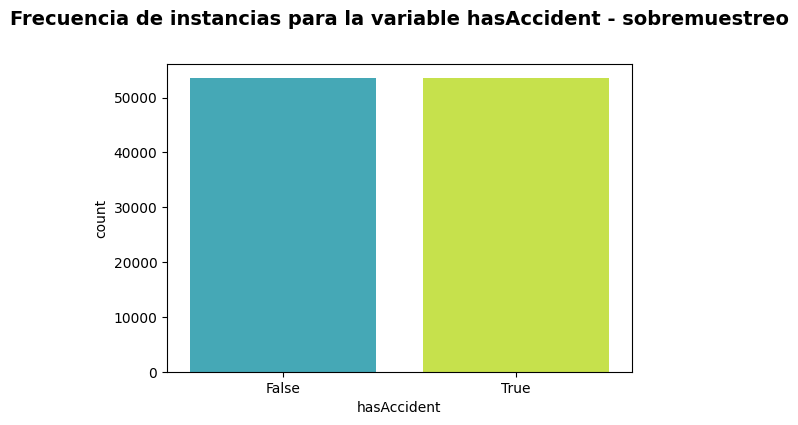

In [33]:
multiple_plot(1, df_balanced, None, y, 'countplot', 'Frecuencia de instancias para la variable hasAccident - sobremuestreo',0)

# 3. Análisis descriptivo

### Variables de entrada

In [34]:
#Listado de Variables Categoricas
catCols = df.select_dtypes(include = ["object", 'category', 'string']).columns.tolist()

#Listado Variables numericas
numCols=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

<ipython-input-5-f2ef2f6bcbb8>:157: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
<ipython-input-5-f2ef2f6bcbb8>:157: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
<ipython-input-5-f2ef2f6bcbb8>:157: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
<ipython-input-5-f2ef2f6bcbb8>:157: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
<ipython-input-5-f2ef2f6bcbb8>:157: UserWarning: set_ticklabels() should onl

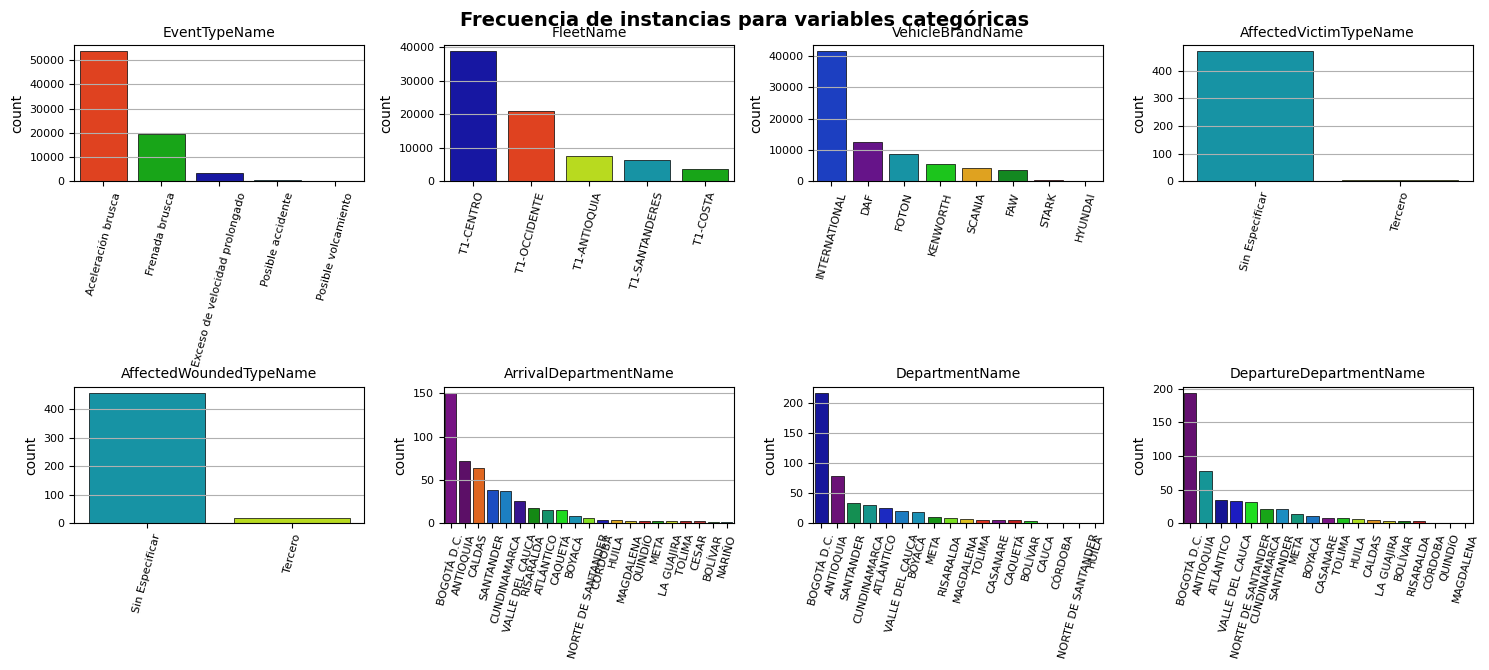

In [35]:
""" Visualización de frecuencia de instancias para variables categóricas

se crea un arreglo fiels_large con los campos con muchas categorías
dejando para un análisis visual de los campos que visualmente nos pueden dar información
================================================================================
"""
fiels_large = ['DepartureTownName', 'ArrivalTownName', 'DateTimeUTC', 'VehicleTypeName', 'DisplayName', 'Driver']
cols = [col for col in catCols if col not in fiels_large]

multiple_plot(4, df, cols, None, 'countplot', 'Frecuencia de instancias para variables categóricas', 75)

<ipython-input-5-f2ef2f6bcbb8>:157: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
<ipython-input-5-f2ef2f6bcbb8>:157: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
<ipython-input-5-f2ef2f6bcbb8>:157: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
<ipython-input-5-f2ef2f6bcbb8>:157: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
<ipython-input-5-f2ef2f6bcbb8>:157: UserWarning: set_ticklabels() should onl

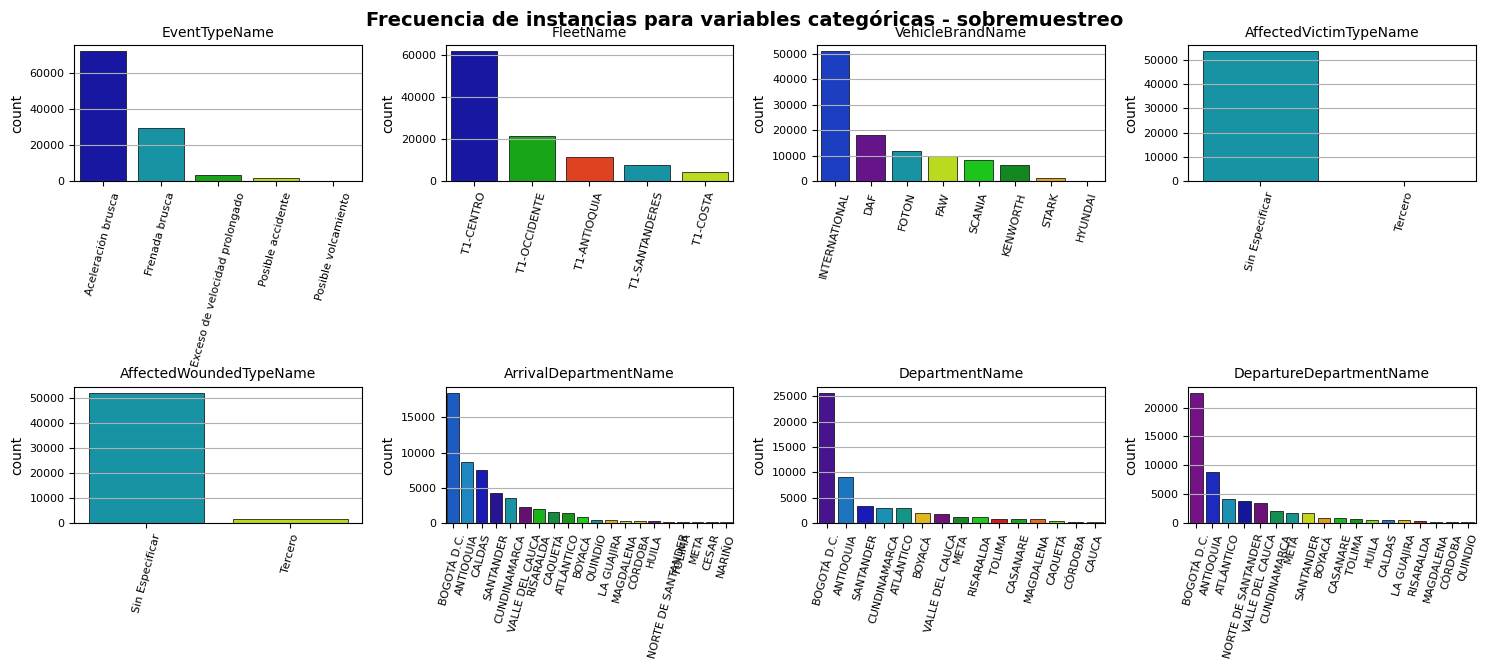

In [36]:
""" Visualización de frecuencia de instancias para variables categóricas para el dataframe de sobremuestreo

se crea un arreglo fiels_large con los campos con muchas categorías
dejando para un análisis visual de los campos que visualmente nos pueden dar información
================================================================================
"""

multiple_plot(4, df_balanced, cols, None, 'countplot', 'Frecuencia de instancias para variables categóricas - sobremuestreo', 75)

In [37]:
""" Distribución cuantica de cada variable categórica en el conjunto de datos
================================================================================
"""
for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(df[col].value_counts())
    print()

===== DateTimeUTC ====================
DateTimeUTC
2024-08-15 14:11:49+00:00    4
2024-07-31 14:14:49+00:00    3
2024-07-19 15:45:18+00:00    3
2024-09-07 13:59:02+00:00    3
2024-09-10 10:53:57+00:00    3
                            ..
2024-07-06 02:43:53+00:00    1
2024-07-06 02:38:33+00:00    1
2024-07-06 02:36:18+00:00    1
2024-07-06 02:35:25+00:00    1
2024-09-30 23:57:25+00:00    1
Name: count, Length: 76155, dtype: int64

===== DisplayName ====================
DisplayName
TRK879    2386
LXS436    1257
LPR163    1088
LPR156     964
LVY480     940
          ... 
JKV214       5
NLW053       5
TRJ641       5
SZW907       4
LTL494       3
Name: count, Length: 336, dtype: int64

===== EventTypeName ====================
EventTypeName
Aceleración brusca                53521
Frenada brusca                    19512
Exceso de velocidad prolongado     3418
Posible accidente                   437
Posible volcamiento                  14
Name: count, dtype: int64

===== FleetName ============

In [38]:
""" Análisis de máximo de hasAccident por Categoría
================================================================================
"""
for col in catCols:
    print(f"\nPromedio de hasAccident por categoría en {col}:")
    print(df.groupby(col)['hasAccident'].max())


Promedio de hasAccident por categoría en DateTimeUTC:
DateTimeUTC
2024-07-01 00:02:06+00:00    False
2024-07-01 00:03:49+00:00    False
2024-07-01 00:08:50+00:00    False
2024-07-01 00:10:21+00:00    False
2024-07-01 00:11:22+00:00    False
                             ...  
2024-09-30 23:44:16+00:00    False
2024-09-30 23:48:11+00:00    False
2024-09-30 23:53:06+00:00    False
2024-09-30 23:55:22+00:00    False
2024-09-30 23:57:25+00:00    False
Name: hasAccident, Length: 76155, dtype: bool

Promedio de hasAccident por categoría en DisplayName:
DisplayName
FNL830    False
FNL831    False
FNL832     True
FNL833    False
FNL834    False
          ...  
TRM819    False
TRM855    False
TSI540    False
TSI541    False
TSI546    False
Name: hasAccident, Length: 336, dtype: bool

Promedio de hasAccident por categoría en EventTypeName:
EventTypeName
Aceleración brusca                 True
Exceso de velocidad prolongado     True
Frenada brusca                     True
Posible accidente       

Necesitamos mas datos, inicialmente tomamos tres (julio-septiembre 2024) meses pero evidenciamos categorias ausentes.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

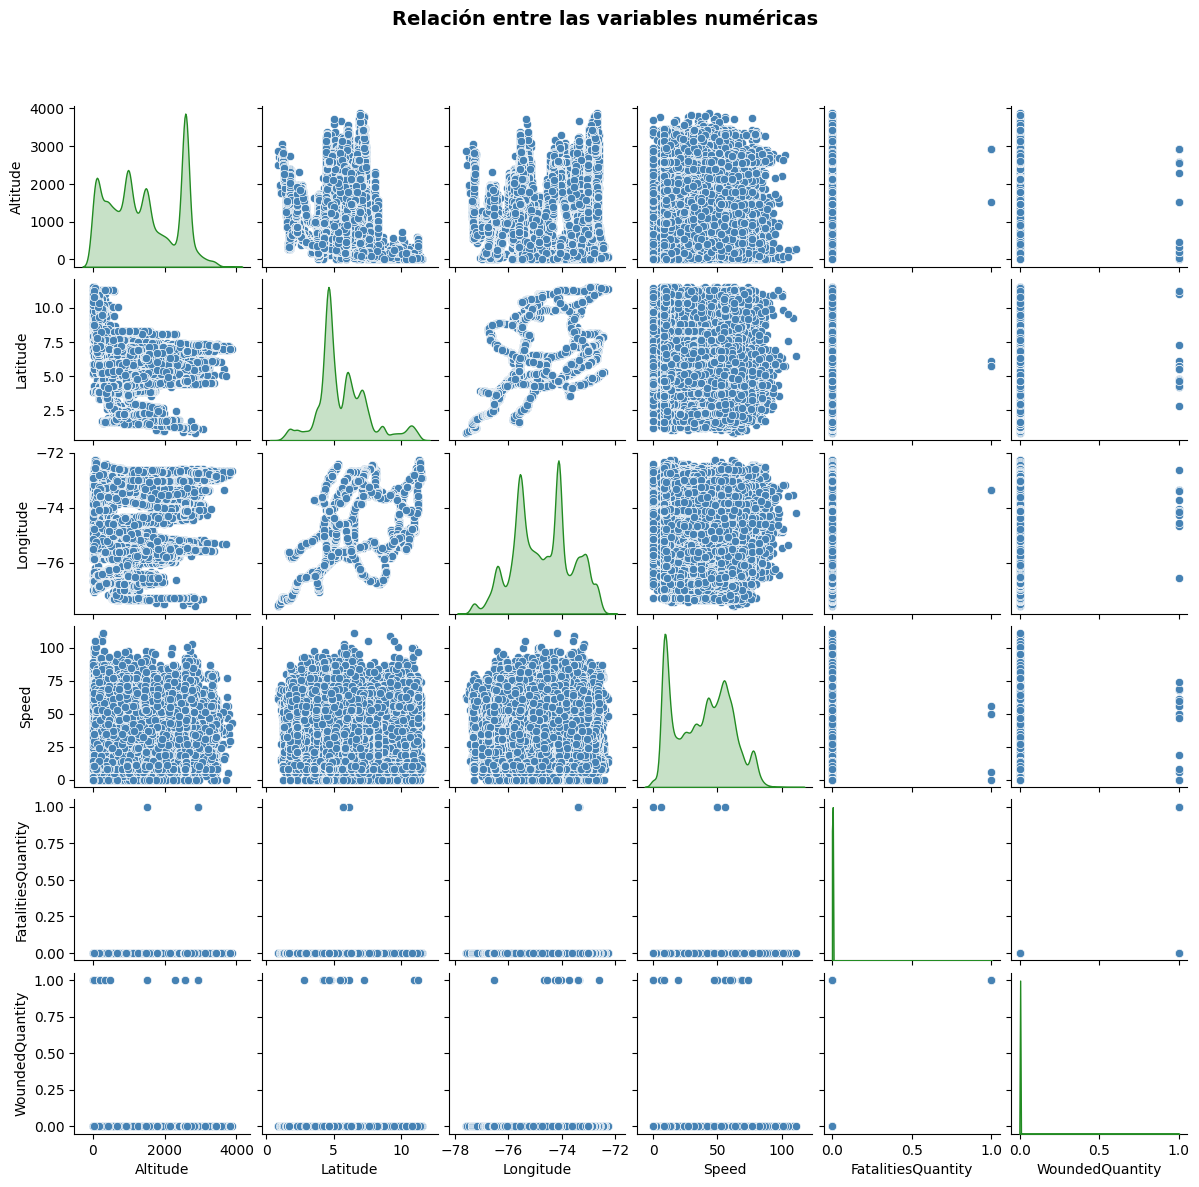

In [39]:
""" Visualización de variables numéricas
================================================================================
"""
multiple_plot(1, df , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

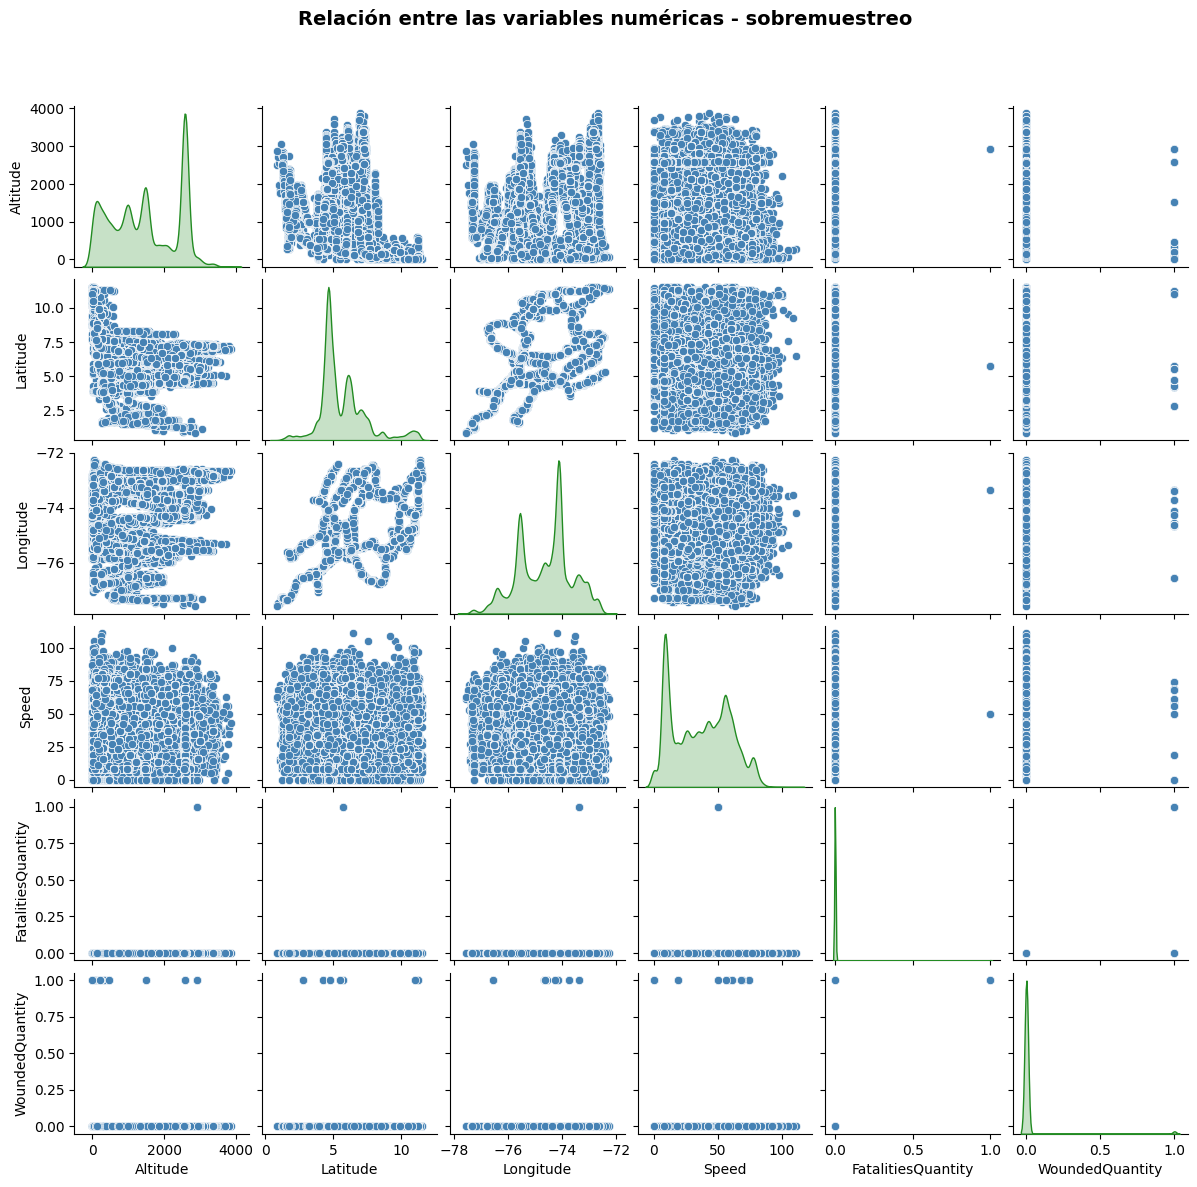

In [40]:
""" Visualización de variables numéricas
================================================================================
"""
multiple_plot(1, df_balanced, numCols, None, 'scatterplot', 'Relación entre las variables numéricas - sobremuestreo',30)

Text(0.5, 1.0, 'Sobremuestreo')

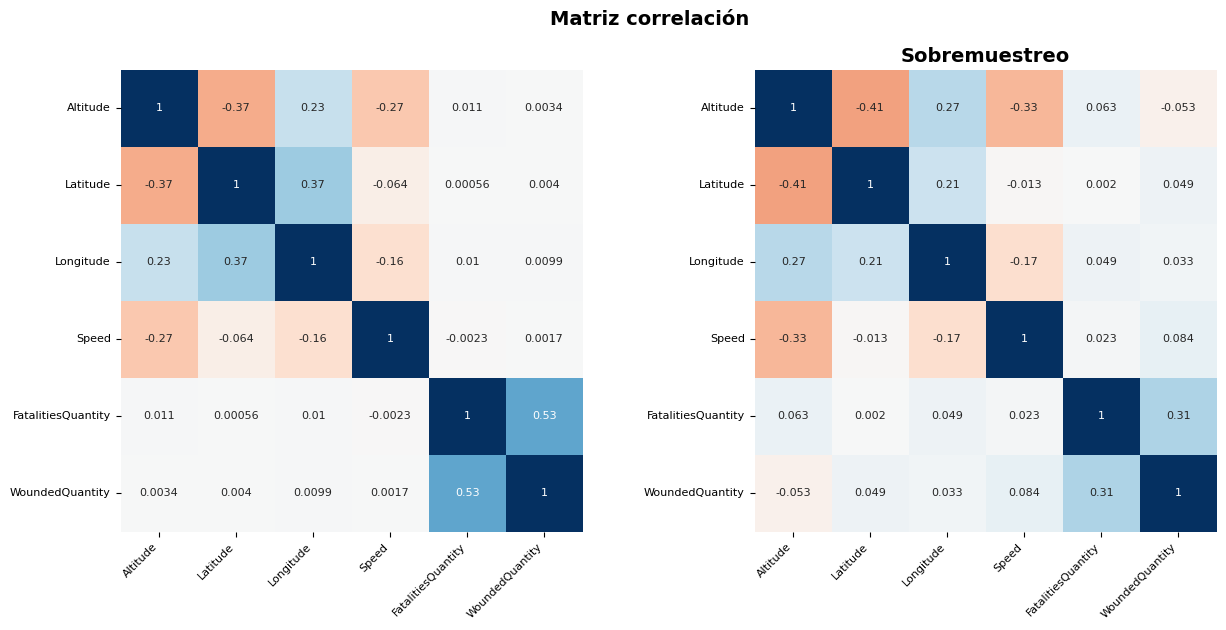

In [41]:
""" Generación de la matriz de correlación y su mapa de calor para los datos normales y los datos balanceados
================================================================================
"""
matrizCorr = df[numCols].corr()
matrizCorr_balanced = df_balanced[numCols].corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle("Matriz correlación", fontsize=14, fontweight="bold")

sns.heatmap(
    matrizCorr,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = 'RdBu',
    square    = True,
    ax        = ax[0]
)

ax[0].set_xticklabels(
    ax[0].get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)


ax[0].tick_params(labelsize = 8)

sns.heatmap(
    matrizCorr_balanced,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = 'RdBu',
    square    = True,
    ax        = ax[1]
)

ax[1].set_xticklabels(
    ax[1].get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)


ax[1].tick_params(labelsize = 8)
ax[1].set_title('Sobremuestreo', fontsize=14, fontweight="bold")


### Variable salida

In [42]:
""" Definición variable de salida quien nos define si hubo o no incidencias asociadas a la eventualidad
================================================================================
"""

y = 'hasAccident'

#### df

In [43]:
# Distribución variable salida
# ==============================================================================
df.groupby(y).hasAccident.count().sort_values(ascending=False)

,hasAccident
hasAccident,
False,76427
True,475


In [44]:
# validación de normalización variabe de salida
# ==============================================================================
df[y].value_counts(normalize=True)

,proportion
hasAccident,
False,0.993823
True,0.006177


In [45]:
# Visualización medidas de tendencia respecto a nuestra variable de salida
# =================================================================
descriptive_stats = df.groupby(y).describe()
descriptive_stats_vertical = descriptive_stats.stack().reset_index()

print(descriptive_stats_vertical)

    hasAccident level_1      Altitude      Latitude     Longitude  \
0         False   count  76427.000000  76427.000000  76427.000000   
1         False    mean   1386.468905      5.656449    -74.730139   
2         False     std    918.587272      1.928491      1.095019   
3         False     min      0.000000      0.856520    -77.582720   
4         False     25%    591.000000      4.529110    -75.577080   
5         False     50%   1273.000000      5.063970    -74.748960   
6         False     75%   2408.000000      6.702845    -74.067240   
7         False     max   3873.000000     11.545350    -72.264650   
8          True   count    475.000000    475.000000    475.000000   
9          True    mean   1503.589474      5.604494    -74.533997   
10         True     std    933.556781      1.564963      0.892467   
11         True     min      3.000000      1.667970    -76.793060   
12         True     25%    708.500000      4.628530    -75.304725   
13         True     50%   1476.000

<ipython-input-45-fdb5aaba47b0>:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  descriptive_stats_vertical = descriptive_stats.stack().reset_index()


<ipython-input-5-f2ef2f6bcbb8>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,
<ipython-input-5-f2ef2f6bcbb8>:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)


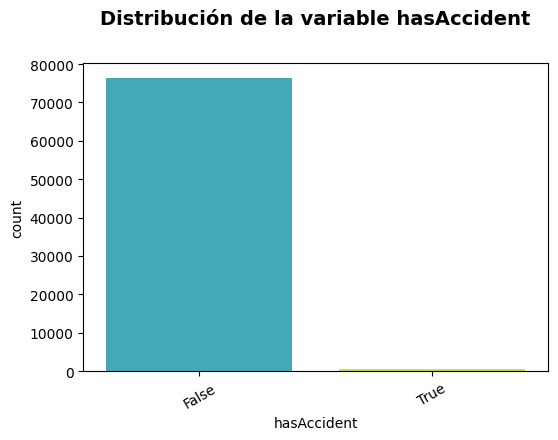

In [46]:
# Visualización distribucion de variable hasAccident
# ==============================================================================

multiple_plot(1, df , None, y, 'countplot', 'Distribución de la variable hasAccident',30)

Dado el desbalance significativo de la variable de salida hasAccidentNum, donde **False** (con accidente) es solo el 0.6% de los datos, planteamos para avanzar en el modelado evaluar si es necesario técnicas de balanceo para mejorar el rendimiento.
 Sobremuestreo de la clase minoritaria o SMOTE. Submuestreo de la clase mayoritaria inviable para el dataset.

#### df_balanced

In [47]:
# Distribución variable salida
# ==============================================================================
df_balanced.groupby(y).hasAccident.count().sort_values(ascending=False)

,hasAccident
hasAccident,
False,53493
True,53493


In [48]:
# validación de normalización variabe de salida
# ==============================================================================
df_balanced[y].value_counts(normalize=True)

,proportion
hasAccident,
False,0.5
True,0.5


In [49]:
# Visualización medidas de tendencia respecto a nuestra variable de salida
# =================================================================
descriptive_stats = df_balanced.groupby(y).describe()
descriptive_stats_vertical = descriptive_stats.stack().reset_index()

print(descriptive_stats_vertical)

    hasAccident level_1      Altitude      Latitude     Longitude  \
0         False   count  53493.000000  53493.000000  53493.000000   
1         False    mean   1383.955415      5.655976    -74.733311   
2         False     std    917.785129      1.935112      1.093865   
3         False     min      0.000000      0.856520    -77.582720   
4         False     25%    590.000000      4.527920    -75.577110   
5         False     50%   1270.000000      5.061780    -74.758980   
6         False     75%   2403.000000      6.703370    -74.072640   
7         False     max   3873.000000     11.545350    -72.264650   
8          True   count  53493.000000  53493.000000  53493.000000   
9          True    mean   1501.355542      5.582956    -74.536153   
10         True     std    919.738233      1.481397      0.865051   
11         True     min      3.000000      2.794430    -76.793060   
12         True     25%    710.000000      4.630500    -75.307000   
13         True     50%   1479.000

<ipython-input-49-921af913f90b>:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  descriptive_stats_vertical = descriptive_stats.stack().reset_index()


<ipython-input-5-f2ef2f6bcbb8>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,
<ipython-input-5-f2ef2f6bcbb8>:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)


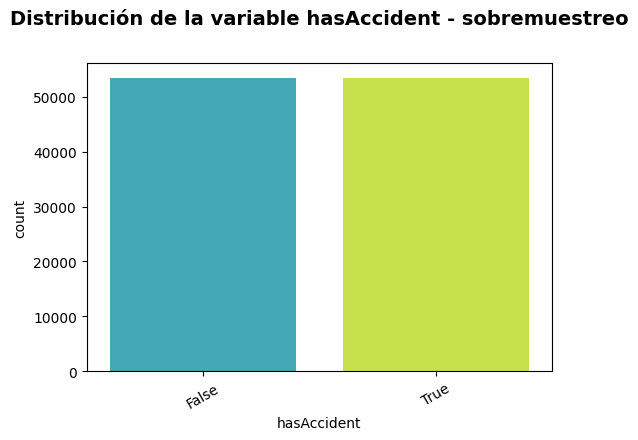

In [50]:
# Visualización distribucion de variable hasAccident
# ==============================================================================

multiple_plot(1, df_balanced, None, y, 'countplot', 'Distribución de la variable hasAccident - sobremuestreo',30)

#### df_outlayers

In [51]:
# Distribución variable salida
# ==============================================================================
df_outlayers.groupby(y).hasAccident.count().sort_values(ascending=False)

,hasAccident
hasAccident,
False,68798
True,413


In [52]:
# validación de normalización variabe de salida
# ==============================================================================
df_outlayers[y].value_counts(normalize=True)

,proportion
hasAccident,
False,0.994033
True,0.005967


<ipython-input-5-f2ef2f6bcbb8>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,
<ipython-input-5-f2ef2f6bcbb8>:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)


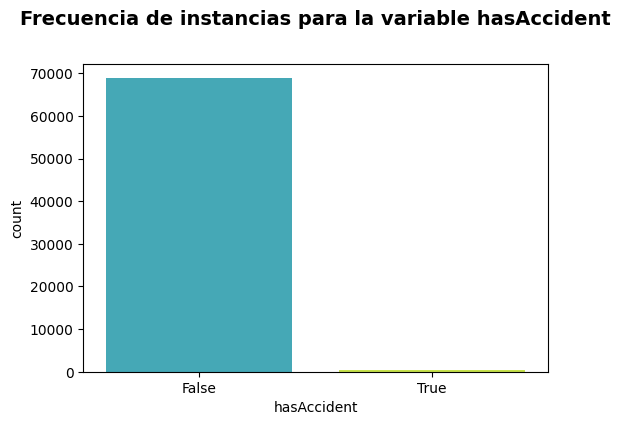

In [53]:
multiple_plot(1, df_outlayers, None, 'hasAccident', 'countplot', 'Frecuencia de instancias para la variable hasAccident',0)